In [2]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import workingDataPath, getWorkingHRDfParquet
import pandas as pd

appleHRDf = getWorkingHRDfParquet('apple')
polarHRDf = getWorkingHRDfParquet('polar')
fitbitHRDf = getWorkingHRDfParquet('fitbit')

c:\Users\abhik\Documents\GitHub\dataImport\utils.py:21: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  dfSoFar = pd.concat([dfSoFar, pd.read_parquet(workingDataHRPath + dataFileName)])
c:\Users\abhik\Documents\GitHub\dataImport\utils.py:21: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dfSoFar = pd.concat([dfSoFar, pd.read_parquet(workingDataHRPath + dataFileName)])
c:\Users\abhik\Documents\GitHub\dataImport\utils.py:21: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, 

In [16]:
from datetime import datetime, date, time, timedelta
import pytz
import matplotlib.pyplot as plt
def graphMultiHRDate(HRDfs, forDate, deviceNames, cutOffTime = time(12,0,0), timezone = 'US/Arizona'):
    graphTimeStart = pytz.timezone(timezone).localize(datetime.combine(forDate - timedelta(days=1), cutOffTime))
    graphTimeEnd = graphTimeStart + timedelta(days=1)

    fig, ax = plt.subplots(figsize=(16.0, 4.0))

    plt.gca().set_title("HR for " + ",".join(deviceNames) + " for " + str(forDate))
    plt.gca().set_ylim([30,210])
    plt.gca().set_xlim([graphTimeStart, graphTimeEnd])
    plt.ylabel("Heart Rate")
    plt.xlabel("Time")
    # xFormatter = plt.matplotlib.dates.DateFormatter('%H:%M', tz=pytz.timezone(timezone))
    # plt.gca().xaxis.set_major_formatter(xFormatter)

    legend1 = []
    for deviceIndex in range(len(deviceNames)):
        # prepping HR
        HRdf = HRDfs[deviceIndex]
        HRdf['sampleDT'] = pd.to_datetime(HRdf.index)
        HRDfForDay = HRdf[(HRdf['sampleDT'] < graphTimeEnd) &
                        (HRdf['sampleDT'] > graphTimeStart)]

        HRTimes = [HRDfForDay.iloc[rowIndex]['sampleDT'] for rowIndex in range(len(HRDfForDay))]
        HRValues = [HRDfForDay.iloc[rowIndex]['value'] for rowIndex in range(len(HRDfForDay))]
        
        ax.plot(HRTimes, HRValues, label=deviceNames[deviceIndex], alpha=.7, linewidth=.7)


    plt.legend(loc="upper left")
    plt.show()




In [21]:
fitbitHRDf.index = fitbitHRDf.index - pd.Timedelta(hours=7)

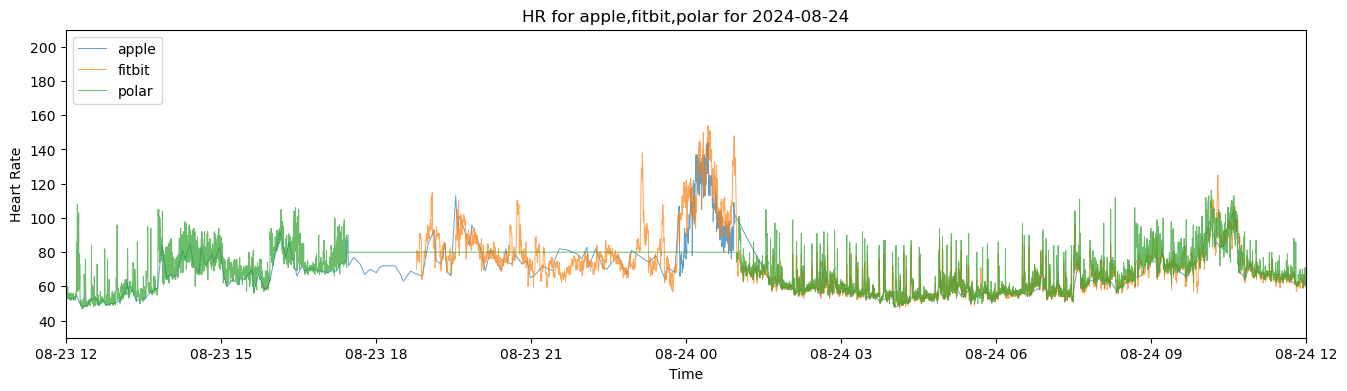

In [23]:
graphMultiHRDate([appleHRDf, fitbitHRDf, polarHRDf], date(2024,8,24), ['apple', 'fitbit', 'polar'])

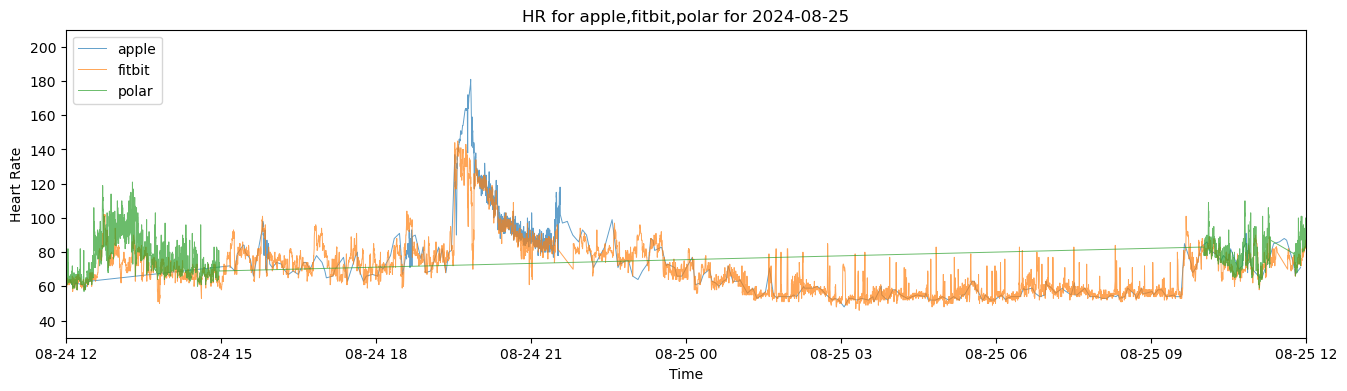

In [24]:
graphMultiHRDate([appleHRDf, fitbitHRDf, polarHRDf], date(2024,8,25), ['apple', 'fitbit', 'polar'])

In [6]:
polarHRDf['sampleDT'].dt.date.unique()

array([datetime.date(2019, 10, 27), datetime.date(2019, 10, 28),
       datetime.date(2019, 10, 29), datetime.date(2019, 10, 30),
       datetime.date(2020, 5, 26), datetime.date(2020, 5, 27),
       datetime.date(2020, 5, 28), datetime.date(2024, 7, 16),
       datetime.date(2024, 7, 17), datetime.date(2024, 7, 18),
       datetime.date(2024, 7, 24), datetime.date(2024, 7, 30),
       datetime.date(2024, 8, 7), datetime.date(2024, 8, 20),
       datetime.date(2024, 8, 21), datetime.date(2024, 8, 22),
       datetime.date(2024, 8, 23), datetime.date(2024, 8, 24),
       datetime.date(2024, 8, 25)], dtype=object)

In [12]:
polarHRDf['sampleDT'][polarHRDf['sampleDT'].dt.date == date(2024,7,30)]

sampleDT
2024-07-30 12:33:15-07:00   2024-07-30 12:33:15-07:00
2024-07-30 12:33:16-07:00   2024-07-30 12:33:16-07:00
2024-07-30 12:33:17-07:00   2024-07-30 12:33:17-07:00
2024-07-30 12:33:18-07:00   2024-07-30 12:33:18-07:00
2024-07-30 12:33:19-07:00   2024-07-30 12:33:19-07:00
                                       ...           
2024-07-30 13:12:42-07:00   2024-07-30 13:12:42-07:00
2024-07-30 13:12:43-07:00   2024-07-30 13:12:43-07:00
2024-07-30 13:12:44-07:00   2024-07-30 13:12:44-07:00
2024-07-30 13:12:45-07:00   2024-07-30 13:12:45-07:00
2024-07-30 13:12:46-07:00   2024-07-30 13:12:46-07:00
Name: sampleDT, Length: 2372, dtype: datetime64[ns, pytz.FixedOffset(-420)]